<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter4/clustCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm clusterdata.*
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv

Python 3.7.12
--2021-11-05 14:16:12--  https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv [following]
--2021-11-05 14:16:12--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4832 (4.7K) [text/plain]
Saving to: ‘clusterdata.csv’

clusterdata.csv     100%[===================>]   4.72K  --.-KB/s    in 0s      

2021-11-05 14:16:

# Example 3.5
## Import modules

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

2.2871307568545203
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1]
[[ 0.5881 -1.3523]
 [-1.9288 -3.0415]
 [-3.8679  0.0459]]


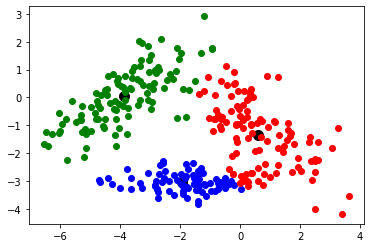

In [4]:
np.set_printoptions(precision=4)

Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
K = 3
n, D = Xmat.shape

def Scluster(c):
    n, D = Xmat.shape # 300*2
    dist2 = np.zeros((K,n)) # 3*300
    cc = c.reshape(D,K) # 2*3
    for i in range(0,K):
        dist2[i,:] = np.sum((Xmat - cc[:,i].T)**2, 1)
    minvals = np.amin(dist2,0)
    return minvals.mean()

numvar = K*D
mu = np.zeros(numvar)  #initialize centers
sigma = np.ones(numvar)*2
rho = 0.1
N = 500; Nel = int(N*rho); eps = 0.001 # Nel : No. of elite samples 

func = Scluster
best_trj = np.array(numvar)
best_perf = np.Inf
trj = np.zeros(shape=(N,numvar))

while(np.max(sigma)>eps): 
        for i in range(0,numvar):
            trj[:,i] = (np.random.randn(N,1)*sigma[i]+ mu[i]).reshape(N,) # try some points around mu
        S = np.zeros(N)
        for i in range(0,N):
            S[i] = func(trj[i])
            
        sortedids = np.argsort(S) # from smallest to largest   
        S_sorted = S[sortedids]  
        best_trj = np.array(n)
        best_perf = np.Inf
        eliteids = sortedids[range(0,Nel)]           
        eliteTrj = trj[eliteids,:]
        mu = np.mean(eliteTrj,axis=0)
        sigma = np.std(eliteTrj,axis=0)
        
        if(best_perf>S_sorted[0]):
            best_perf = S_sorted[0]
            best_trj = trj[sortedids[0]]
            
print(best_perf)

cc = best_trj.reshape(2,3)
p = np.zeros((K,n))

for i in range(0,K):
    p[i,:] = np.sum((Xmat - cc[:,i].T)**2, 1)

label = np.argmin(p,0)

print(label)

for i in range(300):
    if label[i] == 0 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'ro')
    if label[i] == 1 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'bo')
    if label[i] == 2 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'go')

for i in range(3):
    plt.scatter(cc.T[i][0], cc.T[i][1], c='black', s=100)

print(cc.T)
plt.show()